In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline 

In [51]:
#Checks Current Work Directory
import os 
os.getcwd()

'c:\\Users\\jorda\\GitHub\\DFE-DATA4\\Jupyter-Notebook\\Taxi-Analysis'

In [52]:
df = pd.read_csv('nyc-taxi3.csv')
df.head()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1.0,9.40,15,2,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,NaN,14.75,13,4,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,1.0,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,1.0,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,1.0,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30


In [53]:
#Appears to be NaN values in the passengerCount column - in order to populate these with mean values first must find the mean.
df['passengerCount'].mean()

1.348703687090697

In [54]:
#Populating the passengerCount null values with the mean value.
df['passengerCount'].fillna(value=df['passengerCount'].mean(), inplace=True)
df.head()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,normalizeHolidayName,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
0,1.000000,9.40,15,2,1,None,False,29.058824,24.0,3.0,6.185714,44.30
1,1.348704,14.75,13,4,1,None,False,0.000000,6.0,0.0,4.571930,44.80
2,1.000000,3.35,23,4,1,None,False,0.000000,1.0,0.0,4.384091,18.96
3,1.000000,3.33,18,2,1,None,False,29.058824,24.0,3.0,6.185714,16.30
4,1.000000,0.47,17,6,1,None,False,0.000000,1.0,0.0,3.846429,5.30


In [55]:
#Basic statistical information
df.describe()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11617.000000
mean,1.348704,2.866139,13.633884,3.223879,3.502898,1.609015,12.028379,190.782342,10.314244,14.724534
std,0.989573,2.905810,6.670530,1.961855,1.707729,7.146771,10.158597,1211.087724,8.500600,10.966517
min,1.000000,0.010000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,1.000000,1.060000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.566372,8.150000
50%,1.000000,1.900000,15.000000,3.000000,4.000000,0.000000,6.000000,3.000000,10.318229,11.300000
75%,1.000000,3.620000,19.000000,5.000000,5.000000,0.000000,24.000000,41.000000,17.239744,17.800000
max,6.000000,62.550000,23.000000,6.000000,6.000000,67.090909,24.000000,9999.000000,26.524107,339.380000


In [56]:
#totalAmmount doesn't align with the count number indicating missing information
df['totalAmount'].isnull().sum()

117

In [57]:
#Populating the Null values in totalAmount with the mean value
df['totalAmount'].fillna(value=df['totalAmount'].mean(), inplace=True)

In [58]:
#One more check to see if I got every null value in the dataframe
df.isnull().values.any()

False

In [59]:
#Rerunning the describe function now all null values are resolved.
df.describe()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,snowDepth,precipTime,precipDepth,temperature,totalAmount
count,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000
mean,1.348704,2.866139,13.633884,3.223879,3.502898,1.609015,12.028379,190.782342,10.314244,14.724534
std,0.989573,2.905810,6.670530,1.961855,1.707729,7.146771,10.158597,1211.087724,8.500600,10.911701
min,1.000000,0.010000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,-13.379464,3.300000
25%,1.000000,1.060000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,3.566372,8.160000
50%,1.000000,1.900000,15.000000,3.000000,4.000000,0.000000,6.000000,3.000000,10.318229,11.300000
75%,1.000000,3.620000,19.000000,5.000000,5.000000,0.000000,24.000000,41.000000,17.239744,17.760000
max,6.000000,62.550000,23.000000,6.000000,6.000000,67.090909,24.000000,9999.000000,26.524107,339.380000


In [60]:
#Determining correlation in order to identify key variables
df.corr()

,passengerCount,tripDistance,hour_of_day,day_of_week,month_num,isPaidTimeOff,snowDepth,precipTime,precipDepth,temperature,totalAmount
passengerCount,1.000000,0.007685,0.001161,0.033578,-0.000267,-0.005182,0.002831,0.003445,0.001118,-0.000011,0.012583
tripDistance,0.007685,1.000000,-0.054169,0.024936,0.008597,0.013130,0.009923,-0.001689,-0.004524,0.020503,0.905952
hour_of_day,0.001161,-0.054169,1.000000,-0.086562,-0.002458,-0.041185,0.016471,0.007831,0.010947,-0.015054,-0.026391
day_of_week,0.033578,0.024936,-0.086562,1.000000,0.019255,-0.147402,-0.066260,-0.071852,-0.085533,0.016873,0.008388
month_num,-0.000267,0.008597,-0.002458,0.019255,1.000000,-0.115338,-0.301538,0.102491,-0.111110,0.832519,0.011099
isPaidTimeOff,-0.005182,0.013130,-0.041185,-0.147402,-0.115338,1.000000,-0.001425,0.068319,0.242770,-0.090847,-0.004795
snowDepth,0.002831,0.009923,0.016471,-0.066260,-0.301538,-0.001425,1.000000,0.023557,0.057489,-0.233195,0.011693
precipTime,0.003445,-0.001689,0.007831,-0.071852,0.102491,0.068319,0.023557,1.000000,0.172928,0.034417,0.003811
precipDepth,0.001118,-0.004524,0.010947,-0.085533,-0.111110,0.242770,0.057489,0.172928,1.000000,-0.135116,-0.009035
temperature,-0.000011,0.020503,-0.015054,0.016873,0.832519,-0.090847,-0.233195,0.034417,-0.135116,1.000000,0.022819


In [91]:
pearson_coef, p_value = stats.pearsonr(df['totalAmount'], df['temperature'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.022818939197270557  with a P-value of P = 0.013440165445750257


Passenger Count = The Pearson Correlation Coefficient is 0.012582597403126637  with a P-value of P = 0.1729137587240677 
tripDistance = The Pearson Correlation Coefficient is 0.905951729822261  with a P-value of P = 0.0 [Feature]
Hour of the Day = The Pearson Correlation Coefficient is -0.02639142649816067  with a P-value of P = 0.00424968842898697 [Feature]
Day of the Week = The Pearson Correlation Coefficient is 0.008387732852232807  with a P-value of P = 0.36360961784303986
Month = The Pearson Correlation Coefficient is 0.011098814775459005  with a P-value of P = 0.22929674180713222 
precipDepth = The Pearson Correlation Coefficient is -0.009034858814491483  with a P-value of P = 0.3277756603777658 
isPaidTimeOff = The Pearson Correlation Coefficient is -0.004795478419830312  with a P-value of P = 0.6034741056668077 
SnowDepth = The Pearson Correlation Coefficient is 0.0116925191059466  with a P-value of P = 0.2053398562991669 
precipTime = The Pearson Correlation Coefficient is 0.0038114313678147744  with a P-value of P = 0.6797345102214906
Temperature = The Pearson Correlation Coefficient is 0.022818939197270557  with a P-value of P = 0.013440165445750257 [Feature]

In [93]:
df_new = df[['tripDistance','hour_of_day','temperature', 'totalAmount']]
df_new

,tripDistance,hour_of_day,temperature,totalAmount
0,9.40,15,6.185714,44.30
1,14.75,13,4.571930,44.80
2,3.35,23,4.384091,18.96
3,3.33,18,6.185714,16.30
4,0.47,17,3.846429,5.30
...,...,...,...,...
11729,7.47,13,25.704425,35.81
11730,3.76,0,21.695868,16.30
11731,3.45,14,21.990441,14.30
11732,20.20,1,23.116071,68.15


In [111]:
X = df_new[feature_cols]
y = df_new.totalAmount

In [112]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [128]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_new, test_size=0.3)
train

,tripDistance,hour_of_day,temperature,totalAmount
3803,7.01,9,-2.741270,25.30
911,0.71,17,0.613393,6.96
2820,0.52,14,11.998148,6.89
8624,1.94,8,10.483240,16.30
339,1.73,14,-0.896396,8.80
...,...,...,...,...
8164,1.47,15,15.919876,14.16
936,1.40,18,3.365179,10.30
9220,1.70,16,9.451333,9.30
1193,5.38,20,0.613393,25.56


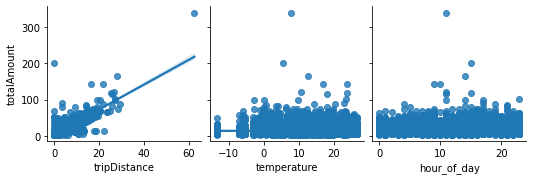

In [133]:
sns.pairplot(df, x_vars=feature_cols, y_vars='totalAmount', kind='reg')

In [134]:
from sklearn import metrics
def train_test_rmse(feature_cols):
    X = df_new[feature_cols]
    y = df_new.totalAmount
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [135]:
print(train_test_rmse(feature_cols))

5.469712828238293
